## Suma y Adelgazamiento de Procesos Poisson

### Suma de Procesos Poisson
Sabemos que si $\{N_1(t)\}_{t \geq 0}$ y $\{N_2(t)\}_{t \geq 0}$ son Procesos Poisson de tasas $\lambda_1, \lambda_2 > 0$, entonces el proceso definido por $N(t) = N_1(t) + N_2(t)$ volvera a ser de Poisson con tasa $\lambda_1 + \lambda_2$. A continuación daremos una idea para simular la suma de dos procesos Poisson.

**Idea para simular suma de Procesos Poisson**
Suponemos que ya tenemos los tiempos de llegada de ambos procesos en listas llamadas $\texttt{llegadas1}$ y $\texttt{llegadas2}$, nuestro objetivo es construir una lista $\texttt{llegadas_suma}$, donde estén las llegadas del proceso a construir.

1. $\texttt{llegadas_suma}$ será la lista ordenada que resulte de concatenar $\texttt{llegadas1}$ y $\texttt{llegadas2}$

2. La lista de valores del proceso será el conjunto $\{0, 1, ..., \texttt{len}(\texttt{llegadas_suma})) \}$

Actualizaremos nuestra segunda función del código anterior para generar la suma de dos Procesos Poisson como éstos.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

class ProcesoPoisson:
  # Recibe la tasa lambda
  def __init__(self, lamb):
    self.lamb = lamb
    self.proceso = pd.DataFrame()

  # Recibe un parámetro t y simulamos hasta ese tiempo
  def simular(self, t):
    llegadas = [0]
    # Mientras la suma no exceda t, genera una exponencial y la agrega a la lista
    while llegadas[-1] < t:
      ti = np.random.exponential(1/self.lamb)
      llegadas.append(llegadas[-1] + ti)
    # N es tal que N_t = N
    N = len(llegadas)
    self.proceso = pd.DataFrame({'n':range(N), 'T_n':llegadas})
    print(f'El proceso tiene {N} salto al tiempo {t}')
    return self.proceso

  # Graficamos el proceso igual que antes
  def plot(self):
    plt.figure(figsize=(7,4))
    for i in range(len(self.proceso['T_n'])-1):
        # Línea horizontal
        plt.plot([self.proceso['T_n'][i], self.proceso['T_n'][i+1]], [self.proceso['n'][i], self.proceso['n'][i]], color='navy')

        # Línea vertical punteada (si no es la última)
        if i < len(self.proceso['n']) - 1:
            plt.plot([self.proceso['T_n'][i+1], self.proceso['T_n'][i+1]], [self.proceso['n'][i], self.proceso['n'][i+1]], color='navy', linestyle='--')

    plt.scatter(self.proceso['T_n'], self.proceso['n'], color='indigo', zorder=3)
    plt.title(f'Proceso Poisson de tasa {self.lamb}')
    plt.xlabel('Tiempo $t$')
    plt.ylabel('Número de eventos $N(t)$')
    plt.grid()

El proceso tiene 3 salto al tiempo 10
El proceso tiene 9 salto al tiempo 10


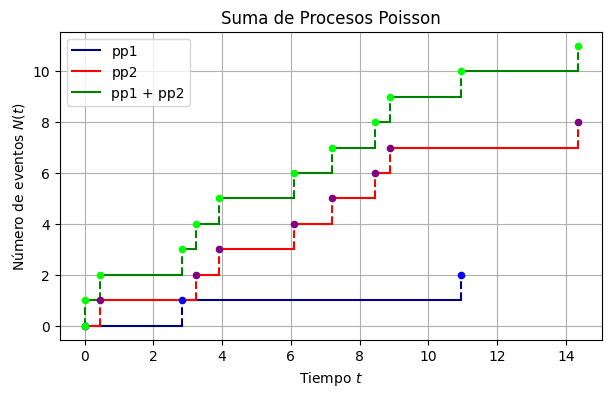

In [4]:
# Generamos los dos procesos base
pp1 = ProcesoPoisson(0.2)
pp2 = ProcesoPoisson(0.5)

# Generamos las trayectorias
pp1_datos = pp1.simular(10)
pp2_datos = pp2.simular(10)

# Hacemos el proceso suma
sum = list(pp1_datos['T_n']) + list(pp2_datos['T_n'])
pp_suma = pd.DataFrame({'n':range(0,len(sum)), 'T_n':sorted(sum)})

# Graficamos
plt.figure(figsize=(7, 4))

# Función auxiliar para graficar un proceso Poisson con líneas y scatter
def graficar_poisson(df, color_linea, color_punto, label=''):
    for i in range(len(df['T_n']) - 1):
        # Línea horizontal
        plt.plot([df['T_n'][i], df['T_n'][i+1]], [df['n'][i], df['n'][i]], color=color_linea, label=label if i == 0 else None)
        # Línea vertical punteada
        plt.plot([df['T_n'][i+1], df['T_n'][i+1]], [df['n'][i], df['n'][i+1]], color=color_linea, linestyle='--')
    # Puntos con scatter
    plt.scatter(df['T_n'], df['n'], color=color_punto, zorder=3, s=20)

# Dibujamos los tres procesos
graficar_poisson(pp1_datos, color_linea='navy', color_punto='blue', label='pp1')
graficar_poisson(pp2_datos, color_linea='red', color_punto='purple', label='pp2')
graficar_poisson(pp_suma, color_linea='green', color_punto='lime', label='pp1 + pp2')

# Ajustes finales
plt.title('Suma de Procesos Poisson')
plt.xlabel('Tiempo $t$')
plt.ylabel('Número de eventos $N(t)$')
plt.legend()
plt.grid()
plt.show()




Ahora actualizaremos nuestra clase para incluir la suma de Procesos Poisson.

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

class ProcesoPoisson:
  def __init__(self, lamb):
    '''
    lamb : tasa de ocurrencia del proceso
    self.proceso : dataframe con los tiempos de ocurrencia de cada evento
    self.pp_suma : dataframe con los tiempos de ocurrencia de la suma de los procesos
    self.pp1 : dataframe con los tiempos de ocurrencia del primer proceso (para sumar)
    self.pp2 : dataframe con los tiempos de ocurrencia del segundo proceso (para sumar)
    '''
    self.lamb = lamb
    self.proceso = pd.DataFrame()
    self.pp_suma = pd.DataFrame()
    self.pp1 = pd.DataFrame()
    self.pp2 = pd.DataFrame()

  # Simular con tiempos de interocurrencia
  def simular(self, t):
    llegadas = [0]
    while llegadas[-1] < t:
        ti = np.random.exponential(1 / self.lamb)
        llegadas.append(llegadas[-1] + ti)
    N = len(llegadas)
    self.proceso = pd.DataFrame({'n': range(N), 'T_n': llegadas})
    return self.proceso

  # Graficar el proceso Poisson
  def plot(self):
    plt.figure(figsize=(7, 4))
    for i in range(len(self.proceso['T_n']) - 1):
        # Línea horizontal
        plt.plot([self.proceso['T_n'][i], self.proceso['T_n'][i + 1]],
                  [self.proceso['n'][i], self.proceso['n'][i]], color='navy')
        # Línea vertical punteada
        plt.plot([self.proceso['T_n'][i + 1], self.proceso['T_n'][i + 1]],
                  [self.proceso['n'][i], self.proceso['n'][i + 1]], color='navy', linestyle='--')
    plt.scatter(self.proceso['T_n'], self.proceso['n'], color='blue', zorder=3, s=20)
    plt.title(f'Proceso Poisson de tasa {self.lamb}')
    plt.xlabel('Tiempo $t$')
    plt.ylabel('Número de eventos $N(t)$')
    plt.grid()
    plt.show()

  # Dividir el proceso en dos que sean su suma
  def sumandos(self, T, lamb1, lamb2):
    if lamb1 + lamb2 != self.lamb:
        raise Exception('Las tasas no coinciden')
    self.pp1 = ProcesoPoisson(lamb1)
    self.pp2 = ProcesoPoisson(lamb2)
    pp1_datos = self.pp1.simular(T // 2)
    pp2_datos = self.pp2.simular(T // 2)
    summ = list(pp1_datos['T_n']) + list(pp2_datos['T_n'])
    self.pp_suma = pd.DataFrame({'n': range(0, len(summ)), 'T_n': sorted(summ)})
    return self.pp_suma

  # Función auxiliar para graficar la suma
  def _graficar_proceso(self, df, color_linea, color_punto, label):
    for i in range(len(df['T_n']) - 1):
        plt.plot([df['T_n'][i], df['T_n'][i + 1]], [df['n'][i], df['n'][i]], color=color_linea, label=label if i == 0 else None)
        plt.plot([df['T_n'][i + 1], df['T_n'][i + 1]], [df['n'][i], df['n'][i + 1]], color=color_linea, linestyle='--')
    plt.scatter(df['T_n'], df['n'], color=color_punto, zorder=3, s=20)

  # Graficas la suma
  def plot_suma(self):
    plt.figure(figsize=(7, 4))
    self._graficar_proceso(self.pp1.proceso, color_linea='navy', color_punto='blue', label='pp1')
    self._graficar_proceso(self.pp2.proceso, color_linea='red', color_punto='purple', label='pp2')
    self._graficar_proceso(self.pp_suma, color_linea='green', color_punto='lime', label='pp1+pp2')
    plt.title('Suma de Procesos Poisson')
    plt.xlabel('Tiempo $t$')
    plt.ylabel('Número de eventos $N(t)$')
    plt.legend()
    plt.grid()
    plt.show()

# Función externa para sumar dos procesos
def sumar_procesos(T, lamb1, lamb2, graficar=True):
  pp1 = ProcesoPoisson(lamb1)
  pp2 = ProcesoPoisson(lamb2)
  # Generamos las trayectorias
  pp1_datos = pp1.simular(T)
  pp2_datos = pp2.simular(T)
  # Hacemos el proceso suma
  sum_tiempos = list(pp1_datos['T_n']) + list(pp2_datos['T_n'][1:])
  pp_suma = pd.DataFrame({'n': range(0, len(sum_tiempos)), 'T_n': sorted(sum_tiempos)})

  # Graficamos
  if graficar:
      plt.figure(figsize=(7, 4))

      def graficar(df, color_linea, color_punto, label):
        for i in range(len(df['T_n']) - 1):
            plt.plot([df['T_n'][i], df['T_n'][i + 1]], [df['n'][i], df['n'][i]], color=color_linea, label=label if i == 0 else None)
            plt.plot([df['T_n'][i + 1], df['T_n'][i + 1]], [df['n'][i], df['n'][i + 1]], color=color_linea, linestyle='--')
        plt.scatter(df['T_n'], df['n'], color=color_punto, zorder=3, s=20)

      graficar(pp1_datos, 'navy', 'blue', 'pp1')
      graficar(pp2_datos, 'red', 'purple', 'pp2')
      graficar(pp_suma, 'green', 'lime', 'pp1+pp2')

      plt.title('Suma de Procesos Poisson')
      plt.xlabel('Tiempo $t$')
      plt.ylabel('Número de eventos $N(t)$')
      plt.legend()
      plt.grid()
      plt.show()

  return pp_suma


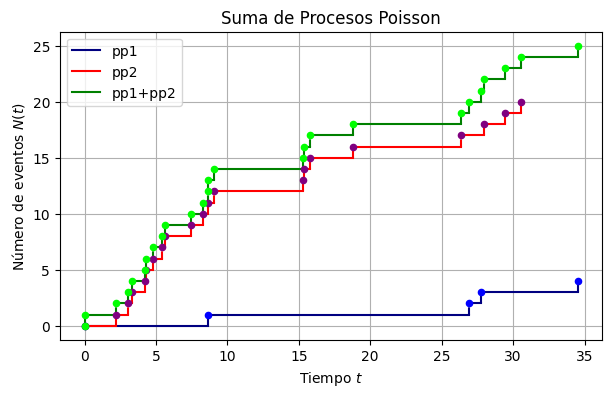

In [12]:
pp3 = ProcesoPoisson(0.7)
pp3.sumandos(60, 0.2, 0.5)
pp3.plot_suma()

Probemos la otra función

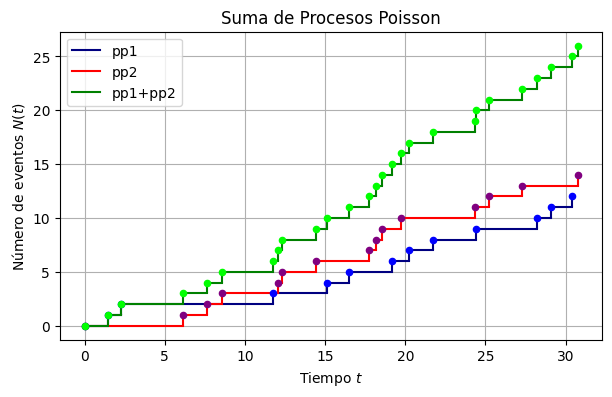

,n,T_n
0,0,0.000000
1,1,1.480127
2,2,2.258036
3,3,6.119923
4,4,7.665882
5,5,8.540541
6,6,11.752780
7,7,12.061908
8,8,12.343012
9,9,14.409798


In [14]:
pp4 = ProcesoPoisson(0.5)
pp5 = ProcesoPoisson(0.9)
sumar_procesos(30, 0.2, 0.5)

### Adelgazamiento de un Proceso Poisson

Sabemos que si al tener un Proceso Poisson $\{N(t)\}_{t \geq 0}$ y clasificamos a los elementos del tipo 1 con probabilidad $p$ y del tipo 2 con probabilidad $1-p$ y si $\{N_i(t)\}_{t \geq 0}$ son los elementos del tipo $i = 1,2$, entonces cada uno de estos procesos vuelve a ser un Proceso Poisson de tasas $\lambda p$ y $\lambda (1-p)$ respectivamente.
Ahora simularemos este proceso de clasificación.

**Idea para simular el adelgazamiento de Procesos Poisson**

Supongamos que ya tenemos el proceso general con $N \in \mathbb{N}$ saltos. Buscamos generar otros dos conjuntos de variables aleatorias $\bar{S}_1, \bar{S}_2, ..., \bar{S}_K$ y $\hat{S}_1, \hat{S}_2, ..., \hat{S}_{N-K}$, donde las primeras sean los tiempos de ocurrencia del proceso $\{N_1(t)\}_{t \geq 0}$ y las segunda del proceso $\{N_2(t)\}_{t \geq 0}$.


1. Generamos una muestra $\{X_i\}_{i=1}^N \sim Ber(p)$. Sea $K = \sum_{i=0}^N X_i$ el número de saltos del proceso tipo 1.

2. Del conjunto $\{S_1, S_2, ..., S_N\}$ elegimos los K valores donde hubo éxitos en la muestra $\{X_i\}_{i=1}^N$. Estos K valores serán las ocurrencias $\bar{S}_1, \bar{S}_2, ..., \bar{S}_K$ del proceso $\{N_1(t)\}_{t \geq 0}$.

3. Definimos $\hat{S}_1, \hat{S}_2, ..., \hat{S}_{N-K}$ como los estadísticos de órden de la muestra $\{S_1, S_2, ..., S_N\} \setminus \{\bar{S}_1, \bar{S}_2, ..., \bar{S}_K\}$.

Ahora veamos esto en acción usando la Clase de Proceso Poisson que habíamos definido antes.

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

class ProcesoPoisson_Ocurrencias:
  def __init__(self, t, n):
    self.t = t
    self.n = n
    self.saltos = pd.DataFrame()

  # Simulamos como antes y lo agregamos a un data frame
  def simular(self):
    uniformes = np.random.uniform(0, self.t, self.n)
    uniformes.sort()
    self.saltos = pd.DataFrame({'n':range(self.n+1), 'T_n':np.concatenate([[0],uniformes])})
    return self.saltos

  # Graficamos igual que antes
  def plot(self):
    plt.figure(figsize=(7,4))
    plt.style.use('seaborn-v0_8-dark')
    for i in range(len(self.saltos['T_n']) - 1):
        # Línea horizontal
        plt.plot([self.saltos['T_n'][i], self.saltos['T_n'][i+1]], [self.saltos['n'][i], self.saltos['n'][i]], color='navy')

        # Línea vertical punteada
        plt.plot([self.saltos['T_n'][i+1], self.saltos['T_n'][i+1]], [self.saltos['n'][i], self.saltos['n'][i+1]],  # Mantenemos fija a la x y movemos y
                color='navy', linestyle='--')
    plt.scatter(self.saltos['T_n'], self.saltos['n'], color='indigo', zorder=3)
    plt.scatter(self.saltos['T_n'], self.saltos['n'], color='blue', zorder=1, s=15)
    plt.title('Proceso Poisson simulado')
    plt.xlabel('Tiempo $t$')
    plt.ylabel('Número de eventos $N(t)$')
    plt.grid()
    plt.show()

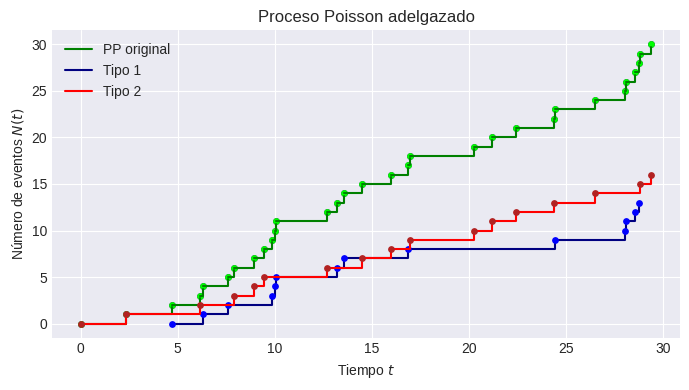

In [31]:
# Simulamos el proceso
proceso1 = ProcesoPoisson_Ocurrencias(30, 30)
saltos1 = proceso1.simular()

# Definimos los parámetros
N = len(saltos1)
p = 0.5

# Generamos la muestra de bernoullis
K = np.random.binomial(1, p, N)

# Guardamos los saltos de ambos tipos
saltos_tipo1 = saltos1[K == 1] # Buscamos los saltos en donde X_i = 1
saltos_tipo2 = saltos1[K == 0] # Buscamos los saltos en donde X_i = 0

# Graficamos los resultados
plt.figure(figsize=(7, 4))
plt.style.use('seaborn-v0_8-dark')

# Dibujamos el Original
plt.scatter(saltos1['T_n'], saltos1['n'], color='indigo', zorder=1, s=15)
T0 = list(saltos1['T_n'])
N0 = list(saltos1['n'])
for i in range(len(saltos1) - 1):
    t0, t1 = T0[i], T0[i+1]
    n0, n1 = N0[i], N0[i+1]
    plt.plot([t0, t1], [n0, n0], color='green', label='PP original' if i == 0 else "")
    plt.plot([t1, t1], [n0, n1], color='green', linestyle='--')
plt.scatter(saltos1['T_n'], saltos1['n'], color='lime', zorder=1, s=15)

# Dibujamos Tipo 1
T1 = list(saltos_tipo1['T_n'])
N1 = list(range(0, len(saltos_tipo1)))
for i in range(len(saltos_tipo1) - 1):
    t0, t1 = T1[i], T1[i+1]
    n0, n1 = N1[i], N1[i+1]
    plt.plot([t0, t1], [n0, n0], color='navy', label='Tipo 1' if i == 0 else "")
    plt.plot([t1, t1], [n0, n1], color='navy', linestyle='--')
plt.scatter(T1, N1, color='blue', s=15, zorder=2)

# Dibujamos Tipo 2
T2 = list(saltos_tipo2['T_n'])
N2 = list(range(0, len(saltos_tipo2)))
for i in range(len(saltos_tipo2) - 1):
    t0, t1 = T2[i], T2[i+1]
    n0, n1 = N2[i], N2[i+1]
    plt.plot([t0, t1], [n0, n0], color='red', label='Tipo 2' if i == 0 else "")
    plt.plot([t1, t1], [n0, n1], color='red', linestyle='--')
plt.scatter(T2, N2, color='firebrick', s=15, zorder=2)

plt.title('Proceso Poisson adelgazado')
plt.xlabel('Tiempo $t$')
plt.ylabel('Número de eventos $N(t)$')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



Ahora añadimos este código a nuestra clase $\texttt{ProcesoPoisson_Ocurrencias}$

In [33]:
class ProcesoPoisson_Ocurrencias:
  def __init__(self, t, n):
    '''
    t : tiempo de simulación
    n : número de saltos
    saltos : dataframe con los tiempos de ocurrencia de cada evento
    saltos_tipo1 : dataframe con los tiempos de ocurrencia del proceso tipo 1
    saltos_tipo2 : dataframe con los tiempos de ocurrencia del proceso tipo 2
    '''
    self.t = t
    self.n = n
    self.saltos = pd.DataFrame()
    # Agregamos al constructor los data frames de tipo 1 y tipo 2
    self.saltos_tipo1 = pd.DataFrame()
    self.saltos_tipo2 = pd.DataFrame()

  def simular(self):
    uniformes = np.random.uniform(0, self.t, self.n)
    uniformes.sort()
    self.saltos = pd.DataFrame({'n': range(self.n+1), 'T_n': np.concatenate([[0], uniformes])})
    return self.saltos

  def plot(self):
    plt.figure(figsize=(7, 4))
    plt.style.use('seaborn-v0_8-dark')
    plt.step(self.saltos['T_n'], self.saltos['n'], where='post', color='navy')
    plt.scatter(self.saltos['T_n'], self.saltos['n'], color='blue', zorder=1, s=15)
    plt.title('Proceso Poisson simulado')
    plt.xlabel('Tiempo $t$')
    plt.ylabel('Número de eventos $N(t)$')
    plt.grid()
    plt.show()

  def adelgazamiento(self, p):
    # Simulamos el proceso
    self.simular()

    # Definimos los parámetros
    N = len(self.saltos)

    # Generamos la muestra de bernoullis
    K = np.random.binomial(1, p, N)

    # Guardamos los saltos de ambos tipos
    self.saltos_tipo1 = self.saltos[K == 1]  # Buscamos los saltos en donde X_i = 1
    self.saltos_tipo2 = self.saltos[K == 0]  # Buscamos los saltos en donde X_i = 0

    return self.saltos_tipo1, self.saltos_tipo2

  def plot_adelgazamiento(self):
    plt.figure(figsize=(7, 4))
    plt.style.use('seaborn-v0_8-dark')

    # Dibujamos el Original
    plt.scatter(self.saltos['T_n'], self.saltos['n'], color='indigo', zorder=1, s=15)
    T0 = list(self.saltos['T_n'])
    N0 = list(self.saltos['n'])
    for i in range(len(self.saltos) - 1):
        t0, t1 = T0[i], T0[i+1]
        n0, n1 = N0[i], N0[i+1]
        plt.plot([t0, t1], [n0, n0], color='green', label='PP original' if i == 0 else "")
        plt.plot([t1, t1], [n0, n1], color='green', linestyle='--')
    plt.scatter(self.saltos['T_n'], self.saltos['n'], color='lime', zorder=1, s=15)

    # Dibujamos Tipo 1
    T1 = list(self.saltos_tipo1['T_n'])
    N1 = list(range(0, len(self.saltos_tipo1)))
    for i in range(len(self.saltos_tipo1) - 1):
        t0, t1 = T1[i], T1[i+1]
        n0, n1 = N1[i], N1[i+1]
        plt.plot([t0, t1], [n0, n0], color='navy', label='Tipo 1' if i == 0 else "")
        plt.plot([t1, t1], [n0, n1], color='navy', linestyle='--')
    plt.scatter(T1, N1, color='blue', s=15, zorder=2)

    # Dibujamos Tipo 2
    T2 = list(self.saltos_tipo2['T_n'])
    N2 = list(range(0, len(self.saltos_tipo2)))
    for i in range(len(self.saltos_tipo2) - 1):
        t0, t1 = T2[i], T2[i+1]
        n0, n1 = N2[i], N2[i+1]
        plt.plot([t0, t1], [n0, n0], color='red', label='Tipo 2' if i == 0 else "")
        plt.plot([t1, t1], [n0, n1], color='red', linestyle='--')
    plt.scatter(T2, N2, color='firebrick', s=15, zorder=2)

    plt.title('Proceso Poisson adelgazado')
    plt.xlabel('Tiempo $t$')
    plt.ylabel('Número de eventos $N(t)$')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


Ahora veamos algunos casos significativos. Por ejmplo, cuando $p=0.9$:

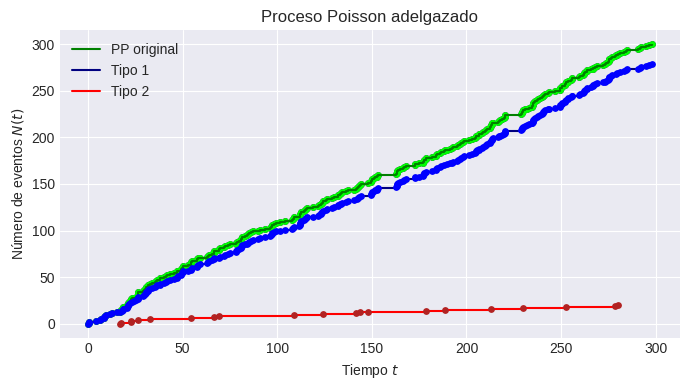

In [34]:
proceso2 = ProcesoPoisson_Ocurrencias(300, 300)
proceso2.simular()
proceso2.adelgazamiento(0.9)
proceso2.plot_adelgazamiento()

Ahora cuando $p=0.1$

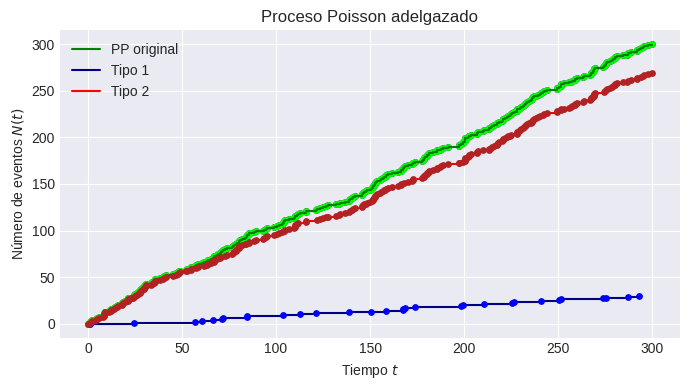

In [35]:
proceso3 = ProcesoPoisson_Ocurrencias(300, 300)
proceso3.simular()
proceso3.adelgazamiento(0.1)
proceso3.plot_adelgazamiento()


Y algunos casos con $p$ cercana al $0.5$

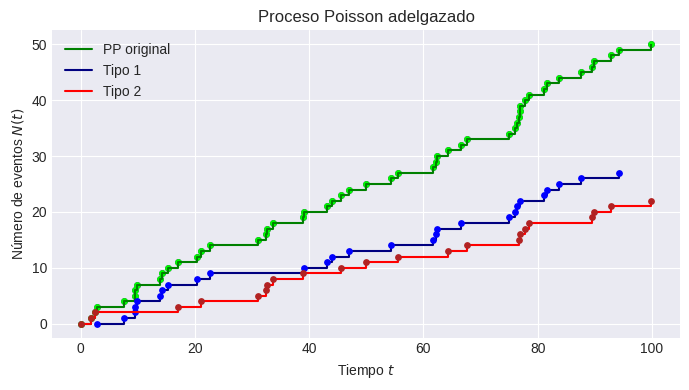

In [40]:
proceso4 = ProcesoPoisson_Ocurrencias(100, 50)
proceso4.simular()
proceso4.adelgazamiento(0.5)
proceso4.plot_adelgazamiento()

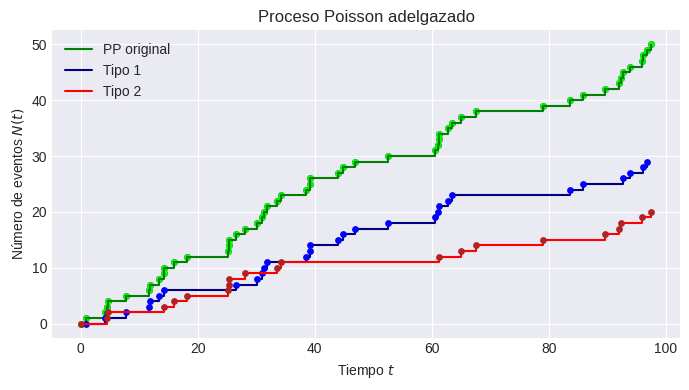

In [43]:
proceso5 = ProcesoPoisson_Ocurrencias(100, 50)
proceso5.simular()
proceso5.adelgazamiento(0.55)
proceso5.plot_adelgazamiento()

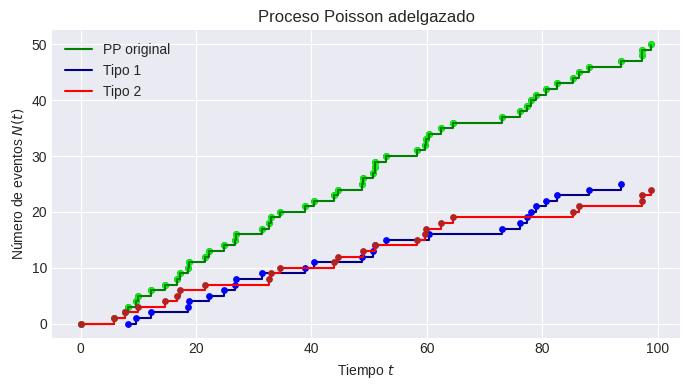

In [42]:
proceso6 = ProcesoPoisson_Ocurrencias(100, 50)
proceso6.simular()
proceso6.adelgazamiento(0.45)
proceso6.plot_adelgazamiento()